<a href="https://colab.research.google.com/github/Mahammed400/Goruntu-isleme/blob/main/MLP_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve,auc,accuracy_score,classification_report,f1_score,mean_squared_error,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from scipy.interpolate import interp1d
from scipy.stats.mstats import winsorize

# Veri setini yükleme ve formatlama
file_path = "veri-seti.txt"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']  # Sütun isimleri
data = pd.read_csv(file_path, header=None, delimiter='\t', names=columns)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
# DataFrame'i yazdır
print(data.to_string(index=False))

 Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  DiabetesPedigreeFunction  Age  Outcome
           6      148             72             35        0 33.6                     0.627   50        1
           1       85             66             29        0 26.6                     0.351   31        0
           8      183             64              0        0 23.3                     0.672   32        1
           1       89             66             23       94 28.1                     0.167   21        0
           0      137             40             35      168 43.1                     2.288   33        1
           5      116             74              0        0 25.6                     0.201   30        0
           3       78             50             32       88 31.0                     0.248   26        1
          10      115              0              0        0 35.3                     0.134   29        0
           2      197             70          

In [17]:

# 0 değerlerini NaN ile değiştirme
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_replace:
    data[column] = data[column].replace(0, pd.NA)

# Outcome'a göre gruplayarak NaN değerlerini doldurma
for column in columns_to_replace:
    data[column] = data.groupby('Outcome')[column].transform(lambda x: x.fillna(x.mean()))

# Aykırı değerleri Winsorize yöntemi ile sınırlama
for column in data.columns.drop(['Outcome', 'Pregnancies']):
    data[column] = winsorize(data[column], limits=[0.05, 0.05])

# Veri tiplerini ayarlama
data['BMI'] = data['BMI'].astype(float)
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].astype(float)
int_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']
data[int_columns] = data[int_columns].astype(int)

# Sonuçları yazdır
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      206  33.6   
1            1       85             66             29      130  26.6   
2            8      181             64             33      206  23.3   
3            1       89             66             23       94  28.1   
4            0      137             52             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     1.136   33        1  


In [18]:
# Min-Max normalizasyonu uygulama
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop('Outcome', axis=1)), columns=data.columns[:-1])

In [19]:
# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['Outcome'], test_size=0.3, random_state=42)

NAIVE BAYES

Accuracy (Naive Bayes): 0.80
Sensitivity: 0.8125
Specificity: 0.7947019867549668

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       151
           1       0.68      0.81      0.74        80

    accuracy                           0.80       231
   macro avg       0.78      0.80      0.79       231
weighted avg       0.82      0.80      0.80       231


Confusion Matrix (Naive Bayes):
[[120  31]
 [ 15  65]]


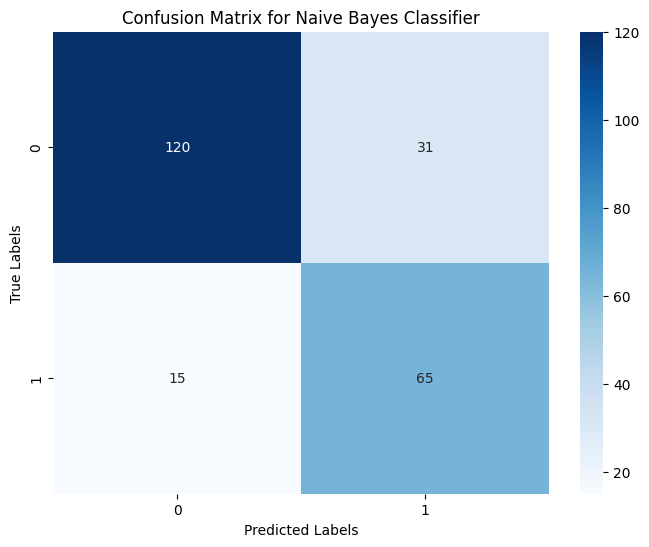

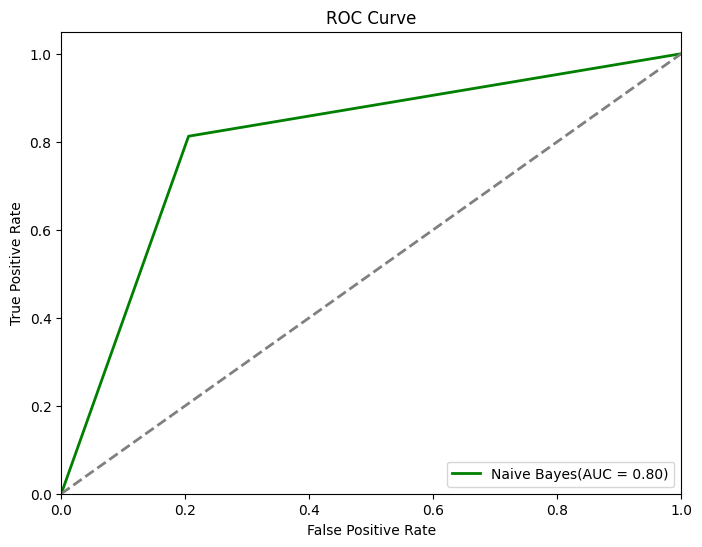

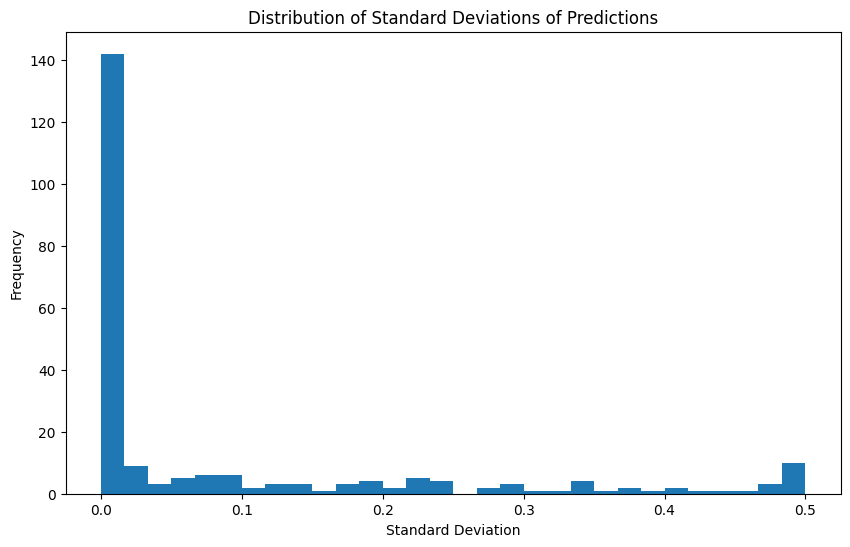

In [20]:
# NAIVE BAYES

# Naive Bayes sınıflandırıcısından tahminler alma
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# Naive Bayes için sensitivity, specificity ve accuracy
tn_nb, fp_nb, fn_nb, tp_nb = confusion_matrix(y_test, nb_predictions).ravel()
sensitivity_nb = tp_nb / (tp_nb + fn_nb)
specificity_nb = tn_nb / (tn_nb + fp_nb)

# Confusion Matrix ve ROC curve için
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_predictions)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Naive Bayes sınıflandırıcısı için performans ölçümlerini hesaplama
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_classification_report = classification_report(y_test, nb_predictions)
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)

# Naive Bayes sınıflandırıcısı için performans ölçümlerini yazdırma
print(f"Accuracy (Naive Bayes): {nb_accuracy:.2f}")
print("Sensitivity:", sensitivity_nb)
print("Specificity:", specificity_nb)
print("\nClassification Report (Naive Bayes):")
print(nb_classification_report)
print("\nConfusion Matrix (Naive Bayes):")
print(nb_confusion_matrix)

# Naive Bayes sınıflandırıcısı için bir karışıklık matrisi çizme
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# ROC Curve çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes(AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Bootstrap yöntemi ile tahminlerin standart sapmasını hesapla
def bootstrap_std(X, y, model, n_iterations=1000):
    predictions = []
    for _ in range(n_iterations):
        # Veri setini örneklemle
        X_sample, y_sample = resample(X, y)
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X)
        predictions.append(y_pred)

  # Tahminlerin standart sapmasını hesapla
    predictions = np.array(predictions)
    std_dev = np.std(predictions, axis=0)
    return std_dev

# Model ve veri seti ile fonksiyonu çağır
std_dev = bootstrap_std(X_test, y_test, nb_classifier)

# Standart sapmayı çizdir
plt.figure(figsize=(10, 6))
plt.hist(std_dev, bins=30)
plt.title('Distribution of Standard Deviations of Predictions')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.show()


KNN



k = 3 için 10 adımda ortalama sonuçlar:
Accuracy: 0.81
Mean Squared Error: 0.19
Mean ROC AUC: 0.82
Classification Report (K MEANS):
              precision  recall  f1-score  support
0                  0.86    0.85      0.86   151.00
1                  0.72    0.75      0.74    80.00
accuracy           0.81    0.81      0.81     0.81
macro avg          0.79    0.80      0.80   231.00
weighted avg       0.82    0.81      0.81   231.00
Confusion Matrix:
[[128.  23.]
 [ 20.  60.]]

k = 5 için 10 adımda ortalama sonuçlar:
Accuracy: 0.79
Mean Squared Error: 0.21
Mean ROC AUC: 0.86
Classification Report (K MEANS):
              precision  recall  f1-score  support
0                  0.85    0.81      0.83   151.00
1                  0.68    0.74      0.71    80.00
accuracy           0.79    0.79      0.79     0.79
macro avg          0.77    0.78      0.77   231.00
weighted avg       0.79    0.79      0.79   231.00
Confusion Matrix:
[[123.  28.]
 [ 21.  59.]]

k = 7 için 10 adımda ortalama s

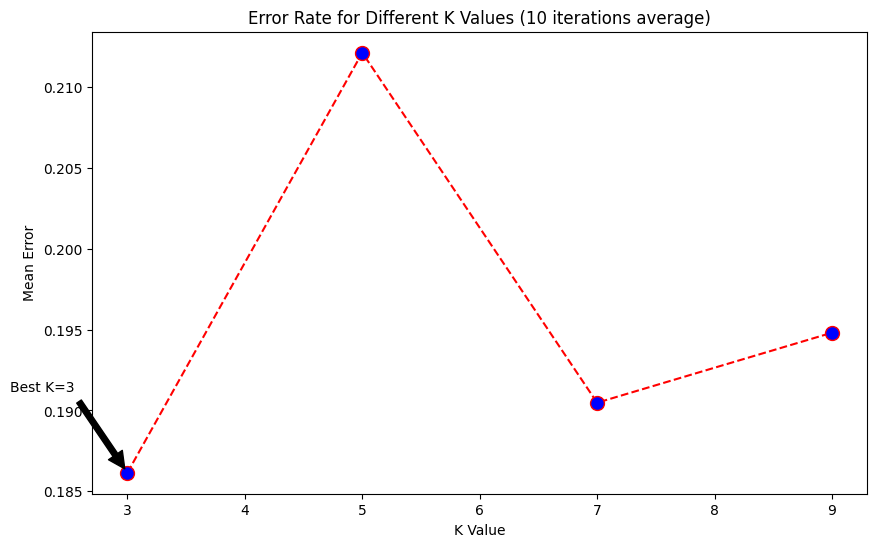

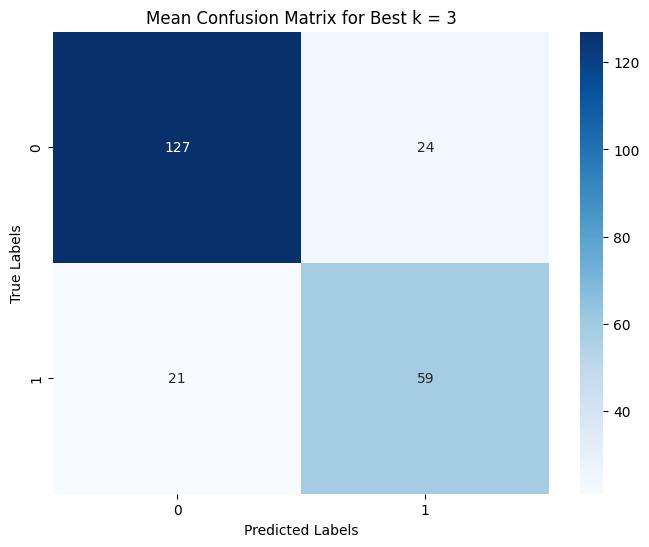

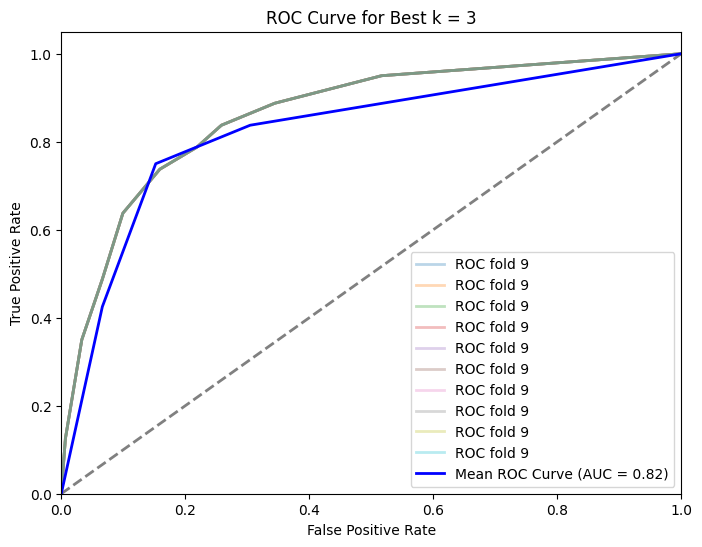

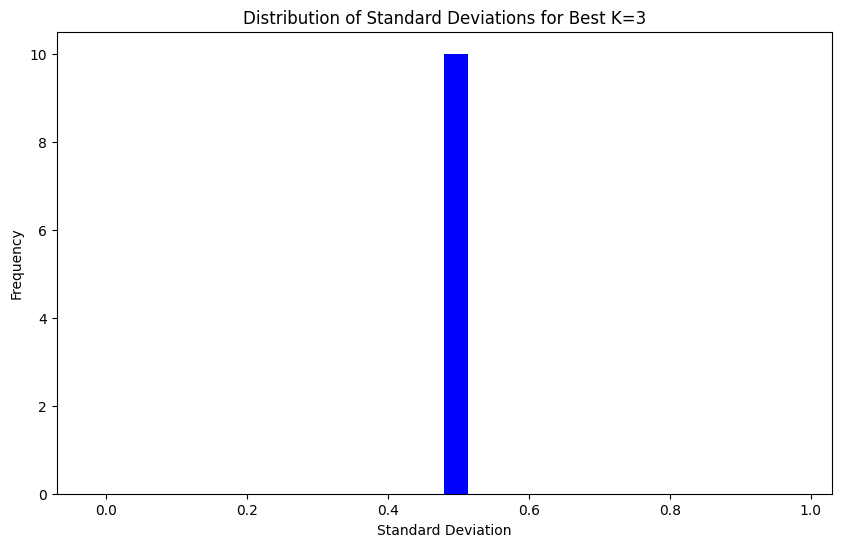

In [22]:

# K değerleri
k_values = [3, 5, 7, 9]
best_k = None
best_accuracy = 0
best_std_devs = None
best_auc_score = 0
mean_errors = []
best_fpr = None
best_tpr = None

for k in k_values:
    print(f"\nk = {k} için 10 adımda ortalama sonuçlar:")

    # Sonuçları depolamak için boş listeler
    acc_scores = []
    confusion_matrices = []
    std_devs = []
    reports = []
    auc_scores = []
    fprs = []
    tprs = []

    for _ in range(10):  # Her bir k değeri için 10 kez çalıştırma
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        knn_predictions = knn.predict(X_test)
        probs = knn.predict_proba(X_test)[:, 1]  # Sınıf olasılıklarını al
        reports.append(classification_report(y_test, knn_predictions, output_dict=True))

        # Accuracy hesapla
        acc_k = accuracy_score(y_test, knn_predictions)
        acc_scores.append(acc_k)

        # Confusion Matrix hesapla
        confusion_matrix_k = confusion_matrix(y_test, knn_predictions)
        confusion_matrices.append(confusion_matrix_k)

        # Standart sapmayı hesapla
        std_dev_k = np.std(knn_predictions)
        std_devs.append(std_dev_k)

        # ROC AUC ve ROC eğrisi değerlerini hesaplama
        fpr, tpr, _ = roc_curve(y_test, probs)
        fprs.append(fpr)
        tprs.append(tpr)
        auc_k = roc_auc_score(y_test, probs)
        auc_scores.append(auc_k)

    # Ortalama sonuçları yazdır
    mean_acc = np.mean(acc_scores)
    if not np.isnan(mean_acc):  # Eğer ortalama accuracy değeri NaN değilse devam et
        mean_errors.append(1 - mean_acc)
        print(f"Accuracy: {mean_acc:.2f}")
        print(f"Mean Squared Error: {mean_squared_error(y_test, knn_predictions):.2f}")
        print(f"Mean ROC AUC: {np.mean(auc_scores):.2f}")

        # En iyi k değerini güncelle
        if mean_acc > best_accuracy:
            best_accuracy = mean_acc
            best_k = k
            best_std_devs = std_devs
            best_auc_score = np.mean(auc_scores)
            best_fpr = np.mean(fprs, axis=0)
            best_tpr = np.mean(tprs, axis=0)

        # Reportların DataFrame olarak birleştirilmesi ve ortalamalarının alınması
        df = pd.DataFrame()
        for report in reports:
            temp_df = pd.DataFrame(report).transpose()
            df = pd.concat([df, temp_df], axis=0)

        mean_df = df.groupby(df.index).mean()
        print("Classification Report (K MEANS):")
        print(mean_df[['precision', 'recall', 'f1-score', 'support']].round(2).to_string())

        # Ortalama Confusion Matrix yazdır
        mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
        print(f"Confusion Matrix:\n{mean_confusion_matrix}")

# En iyi k değeri ve en yüksek doğruluk
print(f"En iyi k değeri: {best_k}, En yüksek doğruluk: {best_accuracy:.2f}")
print()

# Sensitivity ve Specificity hesaplamak için confusion matrix'den TP, TN, FP, FN değerlerini al
TP = mean_confusion_matrix[1][1]
TN = mean_confusion_matrix[0][0]
FP = mean_confusion_matrix[0][1]
FN = mean_confusion_matrix[1][0]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity (Duyarlılık): {sensitivity:.2f}")
print(f"Specificity (Özgünlük): {specificity:.2f}")

# En iyi K değeri için hata oranları grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_errors, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate for Different K Values (10 iterations average)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.annotate(f'Best K={best_k}', xy=(best_k, 1 - best_accuracy),
             xytext=(best_k-1, 1 - best_accuracy + 0.005), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# En iyi k için Confusion Matrix grafiği
plt.figure(figsize=(8, 6))
sns.heatmap(mean_confusion_matrix.astype(int), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Mean Confusion Matrix for Best k = ' + str(best_k))
plt.show()

# En iyi k için ROC Curve grafiği
plt.figure(figsize=(8, 6))
for fpr, tpr in zip(fprs, tprs):
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold {}'.format(k))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.plot(best_fpr, best_tpr, color='blue', lw=2, label=f'Mean ROC Curve (AUC = {best_auc_score:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best k = ' + str(best_k))
plt.legend(loc="lower right")
plt.show()

# En iyi k için Standart Sapma grafiği
plt.figure(figsize=(10, 6))
plt.hist(best_std_devs, bins=30, color='blue')
plt.title(f'Distribution of Standard Deviations for Best K={best_k}')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.show()


MLP

Best Model Parameters: {'hidden_layers': (8,), 'activation': 'tanh', 'learning_rate': 0.3, 'batch_size': 64}
Train Accuracy: 0.88
Test Accuracy: 0.85
Sensitivity: 0.71
Specificity: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       151
           1       0.66      0.71      0.68        80

    accuracy                           0.77       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.78      0.77      0.77       231

Mean Squared Error: 0.23
Mean Confusion Matrix:
[[121  30]
 [ 23  57]]


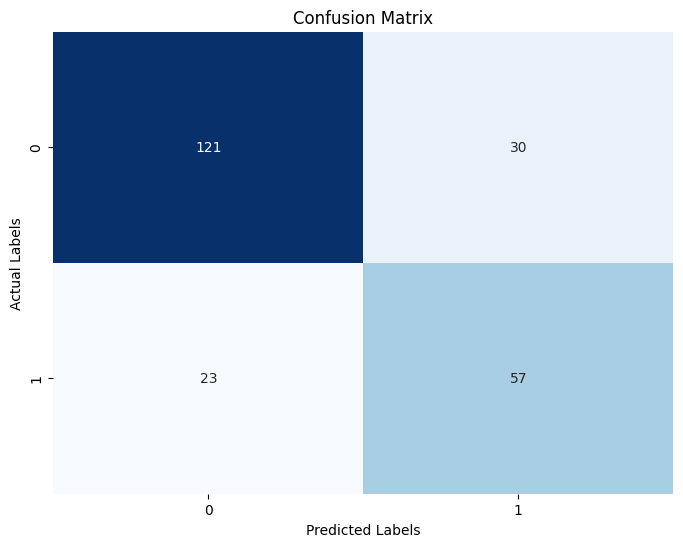

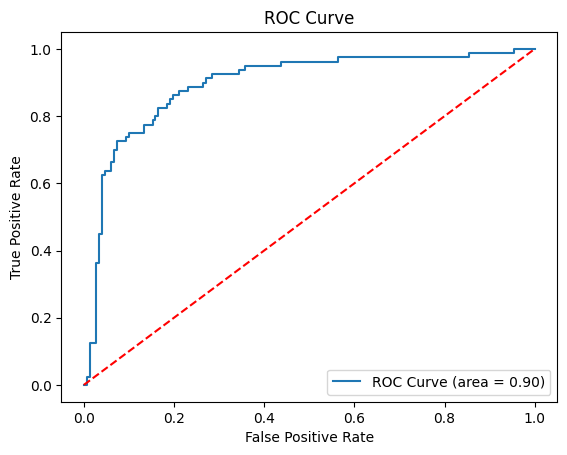

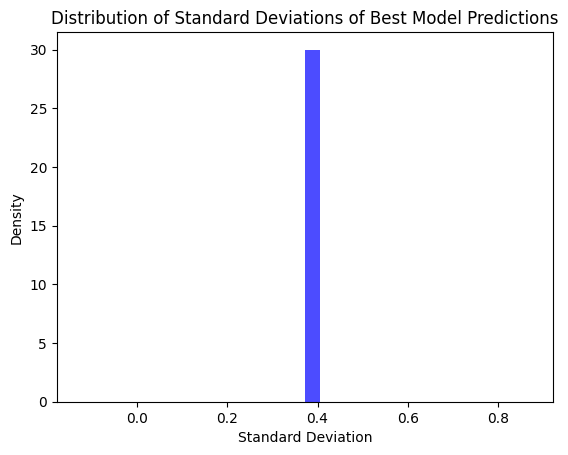

In [23]:
#MLP
# Parametre kombinasyonları
hidden_layer_sizes = [(8,), (16,), (32,), (64,), (128,), (256,)]
activation_functions = ['logistic', 'tanh', 'relu', 'identity']
learning_rates = [0.001, 0.01, 0.1, 0.002, 0.02, 0.2, 0.003, 0.03, 0.3]
batch_sizes = [8, 16, 32, 64, 128, 256]
best_accuracy = 0
best_model_details = {}

for hidden_layers in hidden_layer_sizes:
    for activation in activation_functions:
        for learning_rate in learning_rates:
            for batch_size in batch_sizes:
                mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation,
                                    learning_rate_init=learning_rate, batch_size=batch_size,
                                    max_iter=10000, alpha=0.001, random_state=42)
                mlp.fit(X_train, y_train)
                train_predictions = mlp.predict(X_train)
                test_predictions = mlp.predict(X_test)
                test_accuracy = accuracy_score(y_test, test_predictions)
                train_accuracy = accuracy_score(y_train, train_predictions)

                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_model_details = {
                        'model': mlp,
                        'train_accuracy': train_accuracy,
                        'test_accuracy': test_accuracy,
                        'params': {
                            'hidden_layers': hidden_layers,
                            'activation': activation,
                            'learning_rate': learning_rate,
                            'batch_size': batch_size
                        }
                    }

# Performans metrikleri
probas = best_model_details['model'].predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probas)
mse = mean_squared_error(y_test, test_predictions)
report = classification_report(y_test, test_predictions)
cm = confusion_matrix(y_test, test_predictions)
fpr, tpr, _ = roc_curve(y_test, probas)

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Model detaylarının yazdırılması
print(f"Best Model Parameters: {best_model_details['params']}")
print(f"Train Accuracy: {best_model_details['train_accuracy']:.2f}")
print(f"Test Accuracy: {best_model_details['test_accuracy']:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print("Classification Report:")
print(report)
print(f"Mean Squared Error: {mse:.2f}")
print("Mean Confusion Matrix:")
print(cm)

# Karışıklık Matrisi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Eğrisi
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Standart Sapma Grafiği
std_devs = np.std(probas, axis=0)
plt.figure()
plt.hist(std_devs, bins=30, density=True, color='blue', alpha=0.7)
plt.title('Distribution of Standard Deviations of Best Model Predictions')
plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.show()


SVM

Decision Function: ovo, Kernel: linear, Degree: 3, Accuracy: 0.8181818181818182
Confusion Matrix:
[[127  24]
 [ 18  62]]
Decision Function: ovo, Kernel: linear, Degree: 5, Accuracy: 0.8181818181818182
Confusion Matrix:
[[127  24]
 [ 18  62]]
Decision Function: ovo, Kernel: linear, Degree: 7, Accuracy: 0.8181818181818182
Confusion Matrix:
[[127  24]
 [ 18  62]]
Decision Function: ovo, Kernel: poly, Degree: 3, Accuracy: 0.7965367965367965
Confusion Matrix:
[[130  21]
 [ 26  54]]
Decision Function: ovo, Kernel: poly, Degree: 5, Accuracy: 0.7575757575757576
Confusion Matrix:
[[127  24]
 [ 32  48]]
Decision Function: ovo, Kernel: poly, Degree: 7, Accuracy: 0.7489177489177489
Confusion Matrix:
[[123  28]
 [ 30  50]]
Decision Function: ovo, Kernel: rbf, Degree: 3, Accuracy: 0.8268398268398268
Confusion Matrix:
[[128  23]
 [ 17  63]]
Decision Function: ovo, Kernel: rbf, Degree: 5, Accuracy: 0.8268398268398268
Confusion Matrix:
[[128  23]
 [ 17  63]]
Decision Function: ovo, Kernel: rbf, Degree:

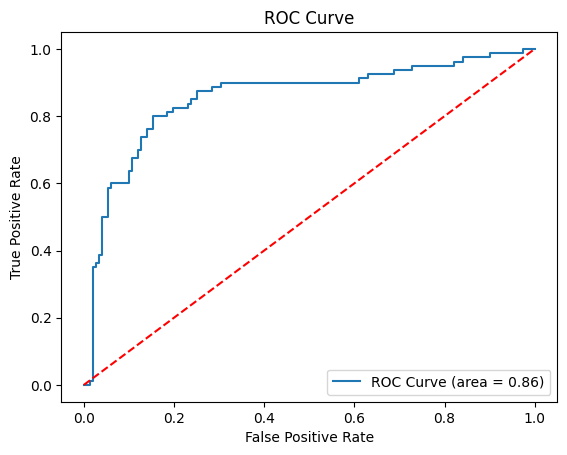

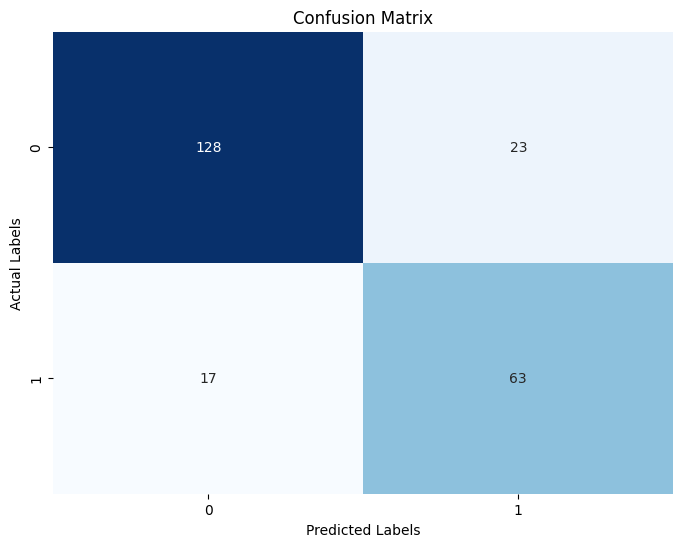

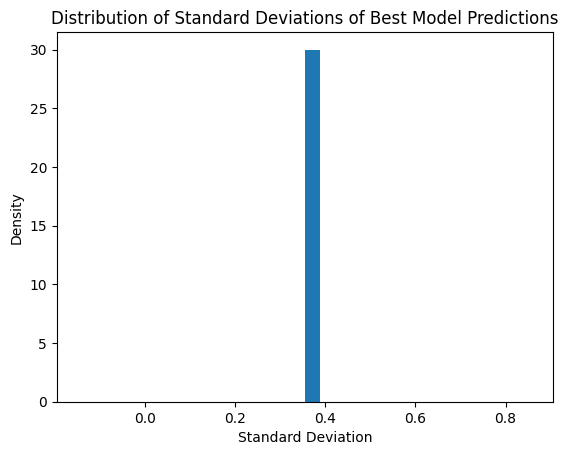

In [24]:
#SVM

# Değerlendirme için değişkenler
best_accuracy = 0
best_params = {}

# 'ovo' ve 'ovr' için döngüler
for decision_function_shape in ['ovo', 'ovr']:
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        for degree in [3, 5, 7]:
            model = SVC(kernel=kernel, degree=degree if kernel == 'poly' else 3, decision_function_shape=decision_function_shape, random_state=42, probability=True)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'kernel': kernel, 'degree': degree, 'decision_function_shape': decision_function_shape, 'model': model}

            # Sonuçları yazdırma
            print(f"Decision Function: {decision_function_shape}, Kernel: {kernel}, Degree: {degree}, Accuracy: {accuracy}")
            cm = confusion_matrix(y_test, y_pred)
            print("Confusion Matrix:")
            print(cm)

# En iyi modelin detaylarını yazdırma
best_model = best_params['model']
y_pred = best_model.predict(X_test)
probas = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probas)
mse = mean_squared_error(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, probas)

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("\nBest Model Parameters:")
print(best_params)
print(f"Train Accuracy: {best_model.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {best_accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print("Classification Report:")
print(report)
print(f"Mean Squared Error: {mse:.2f}")
print("Mean Confusion Matrix:")
print(cm)

# ROC Eğrisi çizdirme
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Karışıklık Matrisi çizdirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Decision boundary
if X_train.shape[1] == 2:  # Eğer veri seti 2 boyutlu ise
    X_min, X_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of the Best Model')
    plt.show()

# Standart sapma grafiği
std_dev = np.std(probas)
plt.figure()
plt.hist(std_dev, bins=30, density=True)
plt.title('Distribution of Standard Deviations of Best Model Predictions')
plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.show()
